# Homework 1 Intro

In this notebook, you will practice concepts from AIMA chapters 1-3. The main topics include:
- History of Artificial Intelligence
- Defining Intelligent Agents
- Uninformed Search

You will write your conceptual answers and code into this notebook. You may include images, links, and math equations as you feel they are needed. I have included cells that suggest where to include your answers, but you can add more cells as needed to keep your work organized.

When you are done with your assignment, make sure to reset your session and test that all of your code works properly when executed from top to bottom.

You will submit this notebook on the Homework 1 assignment on Canvas.

**A note on "correctness"**. As we have already discussed in class, there is no single correct way to solve a problem. Many of these questions are up to interpretation and I am not seeking a specific solution. As long as your solution meets the requirements mentioned in the rubric and problem description, I am less concerned about the details (i.e., I don't care exactly what data structure you use or what the exact outputs are).

 # Part 1: Conceptual Questions

For this part, write your answer in the corresponding cell for each question.

## Question 1.1

To what extent are the following computer systems instances of artificial intelligence?
- Supermarket bar code scanners.
- Voice-activated telephone menus.
- Spelling and grammar correction features in Microsoft Word.
- Internet routing algorithms that respond dynamically to the state of the network.

In your answer, make sure you explicitly mention the terms and definitions we discussed in class. You may also propose an alternate definition of terms, but make sure you justify your answer. I expect you to write a short paragraph (3-6 sentences) for each system.

*Double click and start writing your answer here*

Supermarket barcode scanners aren't really AI because they function as simple reflex agents. They just scan codes with lasers and output product IDs without adapting to damaged codes. These devices do not possess any world model and do not learn from past experiences. They fail to meet our class definition for handling novel situations effectively. Although they mimic human label reading, their capabilities stop there — no reasoning beyond basic recognition. From my experience working at grocery stores, these are merely efficient tools rather than intelligent technology.

Voice-activated telephone menus incorporate limited AI through speech recognition capabilities to direct calls. They function mostly as reflex agents designed for operational efficiency. These systems struggle when encountering unfamiliar accents, which contradict the criteria for novel situations. I consider these automated assistants rather than genuine artificial intelligence implementations.

Microsoft Word's spelling and grammar correction features demonstrate actual AI characteristics because they employ models for analyzing text and proposing corrections. This technology operates as a model-based agent that perceives document content and acts to enhance accuracy. The system handles previously unseen sentences effectively. Grammar checking exceeds simple reflex functionality by evaluating contextual factors and linguistic rules, sometimes outperforming human proofreading speed and aligning with Lecture 1's concept of novel situations. Their ability to adapt to individual writing styles resembles that of a learning agent.

Internet routing algorithms represent a strong AI implementation because they function like goal-based agents. They constantly monitor network conditions and redirect data traffic to prevent congestion. Such algorithms operate in dynamic environments; some versions even incorporate learning capabilities similar to utility-based agents. Their performance exceeds human capabilities in terms of speed and scalability, which connects to the optimization history discussed. While they might not qualify as AI under strictly human-like thinking definitions, their real-time intelligence qualifies them as artificial intelligence in my assessment.


## Question 1.2

For one of the following activities, give a PEAS description of the task environment and characterize it in terms of the properties listed in AIMA Section 2.3. You only need to choose one activity!
- Knitting a sweater
- Exploring the oceans of Titan
- Giving a class presentation about the structure of DNA

There is no expected length for your answer to this question. Make sure you explain your reasoning for each characteristic (e.g., why is the environment fully/partially-observable?).

*Start writing your answer here*
PEAS

Performance Measure: Success is determined by delivering clear information about DNA structure, maintaining student engagement, completing the presentation within the allocated time, and achieving positive assessment outcomes.

Environment: A classroom setting containing students, projection equipment, and potential disruptions such as questions or technical difficulties.

Actuators: Voice projection, physical gestures, and presentation slides serve as primary means for conveying information.

Sensors: Visual observation of audience reactions and auditory reception of questions enable presentation adjustments.


Characterization:

Partially observable, since complete audience mental states and potential disruptions cannot be fully anticipated.

Stochastic due to unpredictable variations in audience responses and possible technical malfunctions.
 
Sequential because presentation components build progressively upon preceding information.

Dynamic as interruptions may occur or attention focus might shift unexpectedly.
 
Continuous, given varying presentation paces and interaction levels throughout.
 
Single-agent, as the presenter operates independently.

# Part 2: Coding Questions

Your solutions to the following problems should be written using the Python programming language.

## Question 2.1

For this question, you will implement a Simple Reflex Agent in the form of a text-based chatbot. The goal of your chatbot is to recommend what CPS course a student should take based on what courses they have taken and what their interests are. You can use the F&M [course catalog](https://catalog.fandm.edu/content.php?filter%5B27%5D=CPS&filter%5B29%5D=&filter%5Bkeyword%5D=&filter%5B32%5D=1&filter%5Bcpage%5D=1&cur_cat_oid=3&expand=&navoid=64&search_database=Filter#acalog_template_course_filter) to determine which classes are available or needed as prerequisites.

The key steps of your solution will be:
- **Interpreting user input**. Given text that the user writes, you must be able to identify specific keywords and match them with your rules.
- **Developing recommendation rules**. Given the keyword(s) you identified, you should be able to match that to a recommendation.
- **Interaction loop**. After choosing a recommendation, you need to appropriately format the output to display to the user. Your agent should continue to ask the user for input until they type `quit`.

I've included the outline of several functions to get you started. You may add additional functions as needed. To test your implementation, I will run the `start_chat()` function. If there are any rules (e.g. acceptable inputs) you want me to follow when interacting with your chatbot, make sure to include a write-up with your code.

Input: Course taken: 1 or many cps course name (seperated by empty space)
Interest : type the keyword
Result It suggests the course you should take

In [ ]:
def start_chat():
    print("Welcome to the CPS Course Recommender! Tell me about your interests or courses taken (type 'quit' to exit).")
    chat_loop()
    
courses = {
    "CPS111": {"name": "Computer Science I", "reqs": [], "tags": ["programming"]},
    "CPS112": {"name": "Computer Science II", "reqs": ["CPS111"], "tags": ["programming"]},
    "CPS222": {"name": "Computer Science III", "reqs": ["CPS112"], "tags": ["programming"]},
    "CPS237": {"name": "Computational Discrete Mathematics", "reqs": ["CPS111"], "tags": ["math"]},
    "CPS242": {"name": "Computer Organization", "reqs": ["CPS112"], "tags": ["hardware"]},
    "CPS261": {"name": "Algorithms", "reqs": ["CPS112", "CPS237"], "tags": ["algorithms"]},
    "CPS337": {"name": "Theory of Computer Science", "reqs": ["CPS112", "CPS237"], "tags": ["theory"]},
    "CPS338": {"name": "Computational Mathematics", "reqs": ["CPS111"], "tags": ["math"]},
    "CPS340": {"name": "Mobile Application Development", "reqs": ["CPS222"], "tags": ["mobile"]},
    "CPS342": {"name": "Operating Systems", "reqs": ["CPS242"], "tags": ["os"]},
    "CPS344": {"name": "Computer Networks", "reqs": ["CPS242"], "tags": ["networks"]},
    "CPS346": {"name": "Parallel Computing", "reqs": ["CPS222"], "tags": ["parallel"]},
    "CPS360": {"name": "Introduction to Machine Learning", "reqs": ["CPS222"], "tags": ["ml", "data"]},
    "CPS363": {"name": "Introduction to Bioinformatics", "reqs": ["CPS222"], "tags": ["bio"]},
    "CPS367": {"name": "Artificial Intelligence", "reqs": ["CPS222", "CPS237"], "tags": ["ai"]},
}

def extract_keywords(text):
    text = text.lower()
    keywords = []
    
    # check for common terms
    keyword_map = {
        "programming": ["programming", "coding", "code"],
        "ai": ["ai", "artificial intelligence"],
        "data": ["data", "analytics"],
        "math": ["math", "mathematics"],
        "algorithms": ["algorithms", "algorithm"],
        "ml": ["ml", "machine learning"],
        "bio": ["bio", "bioinformatics"],
        "networks": ["networks", "networking"],
        "os": ["os", "operating systems"],
        "parallel": ["parallel", "concurrent"],
        "mobile": ["mobile", "app"],
        "theory": ["theory", "theoretical"],
        "hardware": ["hardware", "computer organization"]
    }
    
    for tag, terms in keyword_map.items():
        if any(term in text for term in terms):
            keywords.append(tag)
    
    return keywords

def decide_action(keywords, completed_courses):
    # find matching courses first
    for course_id, course_info in courses.items():
        if course_id in completed_courses:
            continue
            
        # check if course matches interests https://stackoverflow.com/questions/12229064/mapping-over-values-in-a-python-dictionary
        has_match = any(tag in course_info["tags"] for tag in keywords)
        if not has_match:
            continue
            
        # check prerequisites
        prereqs_met = all(req in completed_courses for req in course_info["reqs"])
        if prereqs_met:
            return f"{course_id} - {course_info['name']}"
    
    # fallback: find any available course
    for course_id, course_info in courses.items():
        if course_id not in completed_courses:
            prereqs_met = all(req in completed_courses for req in course_info["reqs"])
            if prereqs_met:
                return f"{course_id} - {course_info['name']}"
    
    return "CPS111 - Computer Science I"

def format_output(recommendation):
    return f"I'd recommend: {recommendation}. Want another suggestion?"

def chat_loop():
    while True:
        # get completed courses
        while True:
            print("What courses have you already taken? (format: CPS111 CPS112 etc.)")
            user_input = input().strip().upper()
            
            if user_input == 'QUIT':
                print("Thanks for using the recommender!")
                return
                
            if not user_input:
                completed = []
                break
                
            course_list = user_input.split()
            completed = []
            invalid = False
            
            for course in course_list:
                if course in courses:
                    completed.append(course)
                elif course:  # not empty but invalid
                    print(f"'{course}' isn't a valid course code. Try again.")
                    invalid = True
                    break
                    
            if not invalid:
                break
        
        # get interests
        while True:
            print("What topics interest you?")
            interests = input().strip()
            
            if interests.upper() == 'QUIT':
                print("Thanks for using the recommender!")
                return
                
            found_keywords = extract_keywords(interests)
            if found_keywords:
                break
            else:
                print("Hmm, try mentioning things like 'programming', 'AI', 'data science', etc.")
        
        recommendation = decide_action(found_keywords, completed)
        print(format_output(recommendation))
        print()  # spacing

In [12]:
# DO NOT CHANGE THIS CELL
# I WILL RUN THIS CELL TO TEST THE CODE YOU WROTE ABOVE

start_chat()

Welcome to the CPS Course Recommender! Tell me about your interests or courses taken (type 'quit' to exit).
What courses have you already taken? (format: CPS111 CPS112 etc.)
'COS1' isn't a valid course code. Try again.
What courses have you already taken? (format: CPS111 CPS112 etc.)
What topics interest you?
I'd recommend: CPS237 - Computational Discrete Mathematics. Want another suggestion?

What courses have you already taken? (format: CPS111 CPS112 etc.)
Thanks for using the recommender!


*write any notes or instructions about your system here*

**Extra Credit Opportunity**: To make your course recommendation agent more "intelligent", try developing more nuanced rules. For example, you could add an action that asks a follow-up question or uses other information to decide between two similar courses. I will award up to 10 extra credit points based on how deeply you interact with this activity.

In [ ]:
# your solution here!

## Question 2.2

For this question, you will implement two versions of Best-First Search on a physical map of your choice. The goal of search is to find a path between the start and goal locations on your map. This is similar to the map of Romania we have been using in class, but I want you to choose/develop a new map that has a different connection structure.

The key steps of your solution are:
- **Develop a map**. This can be in a location of your choosing. Maybe it's the Lancaster County area, or a set of stars in our galaxy. Whatever you choose, do some research to identify at least 20 locations and appropriate connections between them.
- **Implement two algorithms.** You can choose two of the uninformed search algorithms we learned in class. You can organize your code in whatever way makes sense for you as long as it is easy to read. In addition to returning success or failure of the search algorithm, your code should print the solution path if it is found. You may choose from the following algorithms:
    + Breadth-First Search
    + Uniform-Cost Search (Dijkstra's algorithm)
    + Depth-First Search OR Depth-Limited Search OR Iterative Deepening Search (you must also choose one of the others)
- **Test your algorithms.** You will examine the behavior of your algorithms by testing them on three different (start, goal) configurations. That is, your code should run (2 algorithms) x (3 configurations) = 6 total searches.


I will run the `run_search()` function to test your code. You may implement the rest of the question however you wish.

*write about your map here* - tell me where you got your information from and maybe include a picture!

Link: https://courses.cs.washington.edu/courses/cse415/19au/assign/A3.html
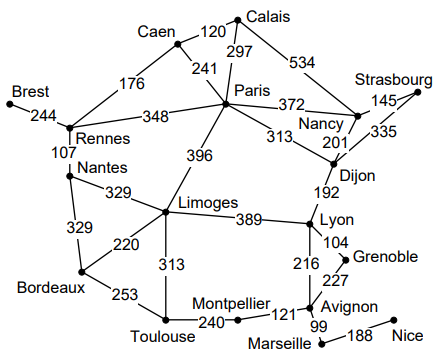

In [ ]:
# your solution goes here! You can add additional cells as needed

def run_search():
    """Runs simulations of 2 algorithms and 3 start/goal configurations
       Parameters: none
       Returns: none
       This can call other functions as needed"""
    
    # your code here
    # French cities - distances in km
    graph = {
        'Brest': {'Rennes': 244},
        'Rennes': {'Brest': 244, 'Nantes': 107, 'Paris': 348, 'Caen': 176},
        'Nantes': {'Rennes': 107, 'Limoges': 329},
        'Limoges': {'Nantes': 329, 'Bordeaux': 220, 'Lyon': 396},
        'Bordeaux': {'Limoges': 220, 'Toulouse': 253},
        'Toulouse': {'Bordeaux': 253, 'Montpellier': 240},
        'Montpellier': {'Toulouse': 240, 'Marseille': 169, 'Avignon': 121},
        'Marseille': {'Montpellier': 169, 'Nice': 188, 'Avignon': 99},
        'Nice': {'Marseille': 188},
        'Avignon': {'Marseille': 99, 'Grenoble': 227, 'Montpellier': 121},
        'Grenoble': {'Avignon': 227, 'Lyon': 104},
        'Lyon': {'Grenoble': 104, 'Dijon': 192, 'Limoges': 396},
        'Dijon': {'Lyon': 192, 'Nancy': 201, 'Paris': 313, 'Strasbourg': 335},
        'Nancy': {'Dijon': 201, 'Paris': 372, 'Strasbourg': 145},
        'Paris': {'Nancy': 372, 'Rennes': 348, 'Caen': 241, 'Strasbourg': 534, 'Dijon': 313},
        'Caen': {'Paris': 241, 'Rennes': 176, 'Calais': 120},
        'Calais': {'Caen': 120},
        'Strasbourg': {'Paris': 534, 'Nancy': 145, 'Dijon': 335},
    }

    #https://www.geeksforgeeks.org/artificial-intelligence/uniformed-search-algorithms-in-ai/
    def ucs(start, goal):
        # just using a list and sorting - not fancy but works
        open_list = [(0, start, [start])]
        closed = set()
        
        while open_list:
            open_list.sort()  # yeah this is O(n log n) but whatever
            cost, node, path = open_list.pop(0)
            
            if node in closed:
                continue
            closed.add(node)
            
            if node == goal:
                return path, cost
                
            for neighbor, dist in graph.get(node, {}).items():
                if neighbor not in closed:
                    open_list.append((cost + dist, neighbor, path + [neighbor]))
        return [], 0
    
    # https://www.geeksforgeeks.org/dsa/breadth-first-search-or-bfs-for-a-graph/
    def bfs(start, goal):
        q = [(start, [start])]
        visited = {start}
        
        while q:
            curr, path = q.pop(0)
            if curr == goal:
                # calc cost
                total = 0
                for i in range(len(path) - 1):
                    total += graph[path[i]][path[i+1]]
                return path, total
                
            for next_city in graph.get(curr, {}):
                if next_city not in visited:
                    visited.add(next_city)
                    q.append((next_city, path + [next_city]))
        return [], 0

    # test cases
    tests = [('Brest', 'Nice'), ('Caen', 'Strasbourg'), ('Bordeaux', 'Calais')]
    
    print("UCS Results:")
    for s, g in tests:
        path, cost = ucs(s, g)
        print(f"{s} -> {g}: {' -> '.join(path)} ({cost} km)")
    
    print("\nBFS Results:")  
    for s, g in tests:
        path, cost = bfs(s, g)
        print(f"{s} -> {g}: {' -> '.join(path)} ({cost} km)")

In [25]:
# DO NOT CHANGE THIS CELL
# I WILL RUN THIS CELL TO TEST THE CODE YOU WROTE ABOVE

run_search()

UCS Results:
Brest -> Nice: Brest -> Rennes -> Nantes -> Limoges -> Lyon -> Grenoble -> Avignon -> Marseille -> Nice (1694 km)
Caen -> Strasbourg: Caen -> Paris -> Nancy -> Strasbourg (758 km)
Bordeaux -> Calais: Bordeaux -> Limoges -> Nantes -> Rennes -> Caen -> Calais (952 km)

BFS Results:
Brest -> Nice: Brest -> Rennes -> Nantes -> Limoges -> Bordeaux -> Toulouse -> Montpellier -> Marseille -> Nice (1750 km)
Caen -> Strasbourg: Caen -> Paris -> Strasbourg (775 km)
Bordeaux -> Calais: Bordeaux -> Limoges -> Nantes -> Rennes -> Caen -> Calais (952 km)


**Extra Credit Opportunity**: Apply the concepts we learned in class to evaluate the performance of your algorithms. What properties of the map lead to different behaviors? Why might one algorithm work "better" than the others? I will assign up to 5 extra credit points based on how deeply you engage with the analysis.

*your thoughts here*

The map properties that create algorithm differences include non-uniform edge weights, with routes varying significantly between cities. BFS incorrectly treats all connections equally (unit cost), optimizing for minimum hops. UCS properly accounts for actual distances, finding truly minimal total distance even when requiring additional stops.
Alternative paths with different trade-offs exist because the graph shows dense connectivity in central regions but sparser connections elsewhere. This creates situations where fewer-hop routes can actually have higher total distances. As a result, BFS often selects "direct but costlier" routes.

The algorithms show expansion-order sensitivity. BFS path selection depends on neighbor-listing order in the dictionary. This explains why, during the Brest–Nice calculation, BFS detoured southward because Bordeaux was processed before Lyon. UCS remains order-independent for final cost calculation due to priority-based processing.
The graph structure lacks cycles and contains undirected edges, making it bidirectional but effectively acyclic for practical paths. Central hub cities like Paris enable UCS to find shortcuts that BFS misses when focusing solely on hop minimization.

UCS proves superior for minimal distance (our real-world objective) because it guarantees optimality when calculating actual kilometers traveled. UCS is complete and optimal for non-negative weights. It "works better" by saving 56 kilometers on the Brest–Nice route and 17 kilometers for Caen–Strasbourg compared to BFS.

BFS would be preferable when minimizing city transfers or stops, as it achieves optimality for unweighted graphs as discussed in Lecture 3. It also offers computational-efficiency advantages in large graphs by avoiding the sorting overhead of UCS.

In this variable-weight map with multiple route alternatives, UCS excels at cost optimization similar to GPS applications, while BFS better suits hop minimization like network routing with uniform connection costs.
